In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfits

from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

In [13]:
def get_lc_path(path):   
    lightcurve=pyfits.open(path)
    #barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
    header=lightcurve[0].header
    tstart=header['tstart']
    #print('originlc:')
    #print(repr(header[:]),'\n')
    obstime=header['DATE-OBS']
    time=lightcurve[1].data['TIME']
    count=lightcurve[1].data['RATE']
    plt.figure(figsize=(int(time[-1]/1000+6),6))
    plt.plot(time,count)
    plt.semilogy()
    plt.xticks(np.arange(0,time[-1]+1000,1000),rotation=30)
    return time,count,obstime,tstart

In [4]:
def get_interval_time(time):
    size=len(time)
    index=[]
    index1=[0]
    for i in np.arange(len(time)-1):
        if time[i+1]-time[i]>20:
            index.append(i)
            index1.append(i+1)
    index.append(len(time)-1)        
    return time[index],time[index1]

In [5]:
def lc_pds(time,count,timemin,timemax):
    t=[]
    x=[]
    for index,(t_,c_) in enumerate(zip(time,count)):
        if (t_>=timemin and t_<timemax):
            t.append(t_)
            x.append(c_)   
    xF = np.fft.fft(x)
    freq = np.fft.fftfreq(len(t))
    ls = LombScargle(t, x)
    freq_ls, power_ls = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=0.5,
                           samples_per_peak=10)
    plt.figure(figsize=(6,6))
    plt.subplot(311)
    plt.title('%s:from %d to %d'%(obstime,t[0],t[-1]))
    plt.plot(t,x)
    #plt.xticks(np.arange(0,t[-1]+1000,1000),rotation=30)
    plt.semilogy()
    plt.xlabel('time')
    plt.ylabel('count')
    plt.subplot(312)
    plt.plot(freq,abs(xF)**2)
    plt.semilogx()
    plt.semilogy()
    plt.ylabel('power/fft')
    plt.subplot(313)
    plt.plot(freq_ls,power_ls)
    plt.semilogx()
    plt.semilogy()
    plt.xlabel('frequency/Hz')
    plt.ylabel('power/ls')
    plt.tight_layout()
  

In [6]:
def get_lc__pds_path(path):   
    lightcurve=pyfits.open(path)
    #barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
    header=lightcurve[0].header
    obstime=header['DATE-OBS']
    time=lightcurve[1].data['TIME']
    count=lightcurve[1].data['RATE']
    indexleft,indexright=get_interval_time(time)
    for i,(indexleft_,indexright_) in enumerate(zip(indexleft,indexright)):
        print(i,indexright_,indexleft_)
        lc_pds(time,count,indexright_,indexleft_)

In [ ]:
24*3600

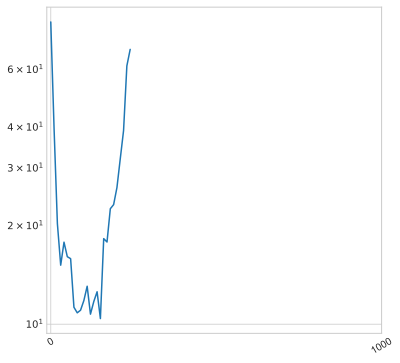

In [10]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/nustar_v404/90102007002/grp_pipeline_products_low_29250_29500/V404cygA01_sr.lc'
time,count,obstime,tstart=get_lc_path(path)

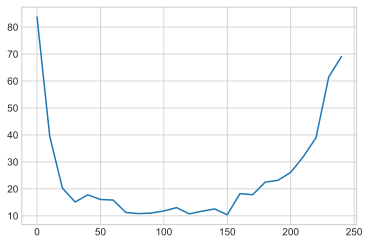

In [11]:
plt.plot(time,count)

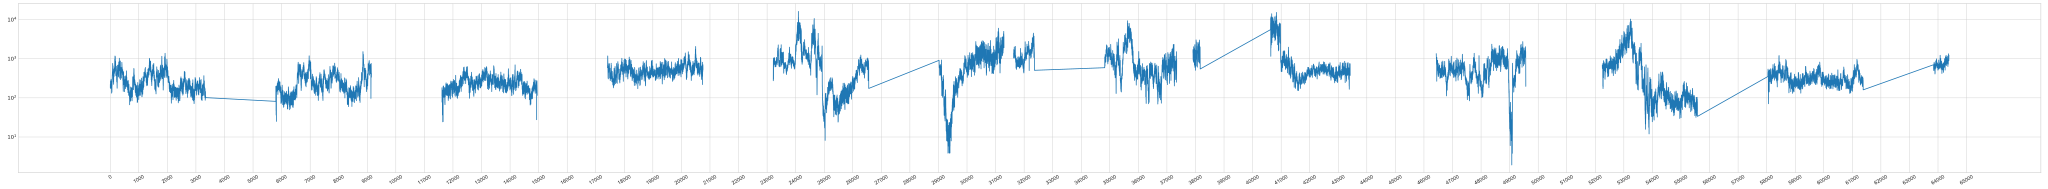

In [7]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/nustar_v404/90102007002/grp_pipeline_products/V404cygA01_sr.lc'
time,count,obstime,tstart=get_lc_path(path)

In [ ]:
tstart,obstime

In [ ]:
plt.figure(figsize=(12,2))
plt.plot(time,count)
plt.semilogy()

In [ ]:
get_lc__pds_path(path)

0 0.0 3341.0


/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


1 5798.0 9147.0
2 11612.0 14951.0
3 17410.0 20756.0
4 23216.0 26559.0
5 29022.0 31296.0
6 31632.0 32361.0
7 34822.0 37345.0
8 37912.0 38166.0
9 40628.0 43418.0


/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: divide by zero encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)
/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)


10 46430.0 49569.0
11 52244.0 55578.0
12 58042.0 61380.0
13 63845.0 64383.0


/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


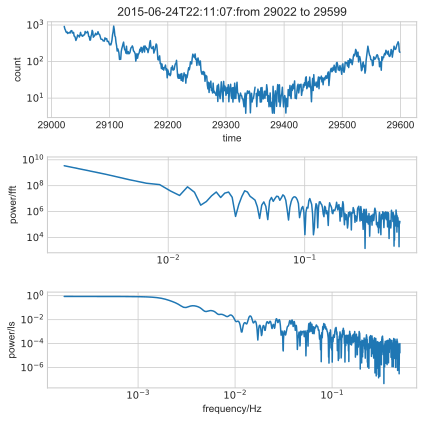

In [9]:
lc_pds(time,count,29000, 29600)

In [ ]:
lc_pds(time,count,28000, 30000)

In [ ]:
lc_pds(time,count,35800, 37000)

In [ ]:
lc_pds(time,count,35600, 35800)

In [ ]:
lc_pds(time,count,34822, 35600)

In [ ]:
lc_pds(time,count,41500, 43417)

In [ ]:
lc_pds(time,count,41000, 41500)

In [ ]:
lc_pds(time,count,41000, 41517)

In [ ]:
lc_pds(time,count,40500,41000)

In [ ]:
lc_pds(time,count,52244, 52600)

In [ ]:
lc_pds(time,count,54000, 55577)

In [ ]:
lc_pds(time,count,52800,53400)

In [ ]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/nustar_v404/90102007003/grp_pipeline_products/V404cygA01_sr.lc'
time,count,obstime=get_lc_path(path)

In [ ]:
get_lc__pds_path(path)

In [ ]:
lc_pds(time,count,1300,2700)

In [ ]:
lc_pds(time,count,0,1200)

In [ ]:
lc_pds(time,count,5300,6000)

In [ ]:
lc_pds(time,count,6200,6500)

In [ ]:
lc_pds(time,count,7000,8050)

In [ ]:
lc_pds(time,count,12500,12800)

In [ ]:
lc_pds(time,count,12000,12500)

In [ ]:
lc_pds(time,count,18000,19000)

In [ ]:
lc_pds(time,count,23000,23700)

In [ ]:
lc_pds(time,count,28800,30500)